In [1]:
%pip install matplotlib pillow torch torchvision transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
from dataset import get_train_dataloader
import torchvision.transforms.functional as F
import numpy as np
from util import show_image_with_boxes

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


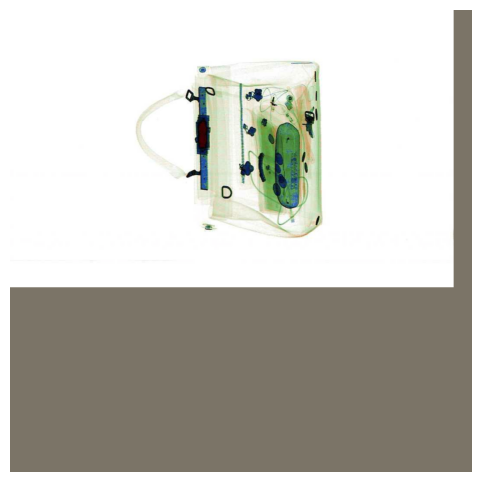

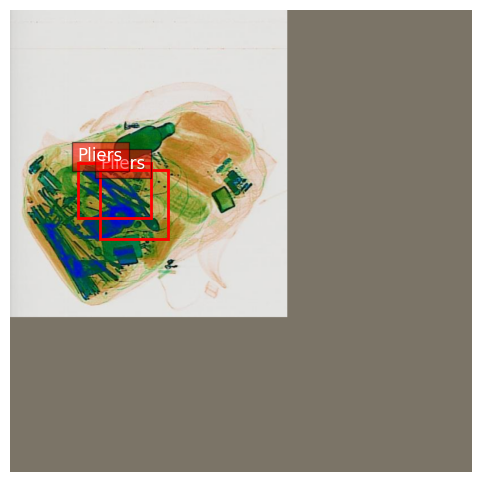

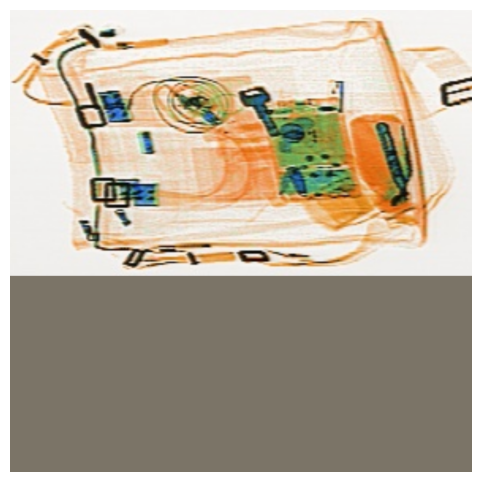

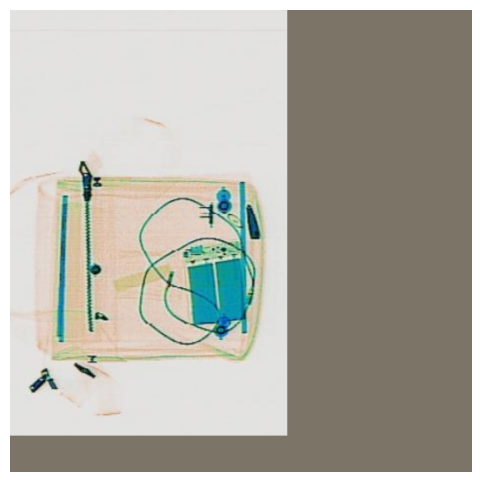

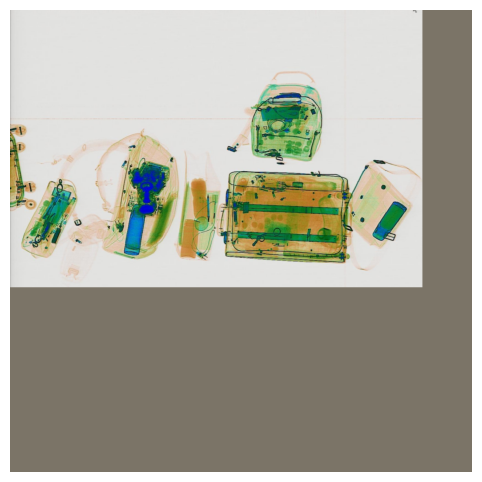

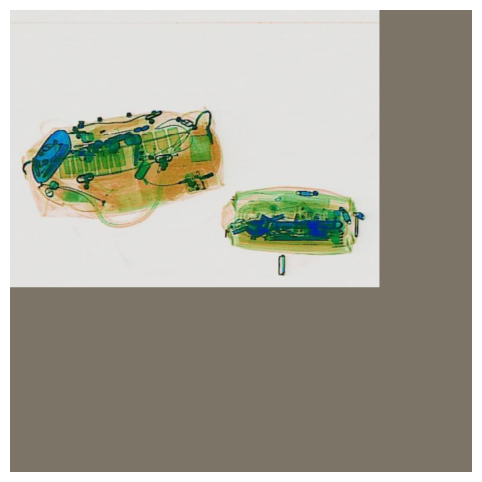

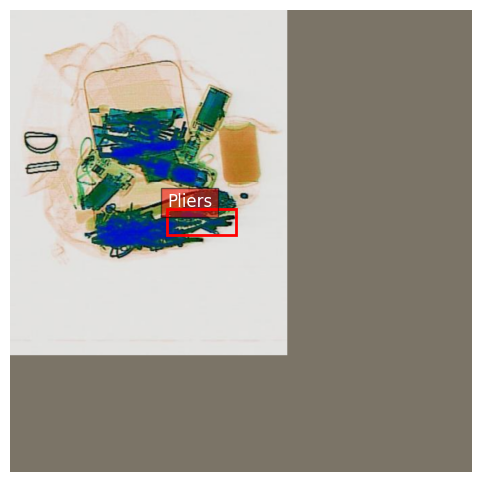

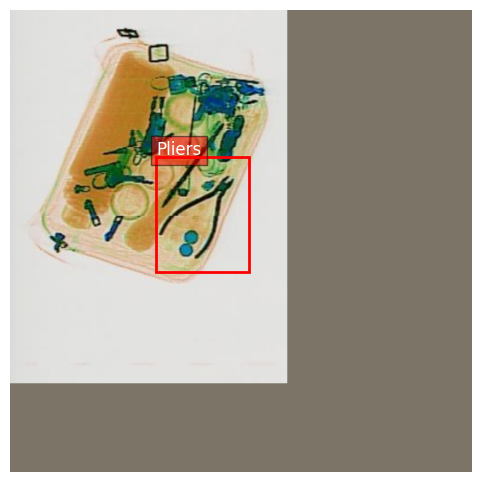

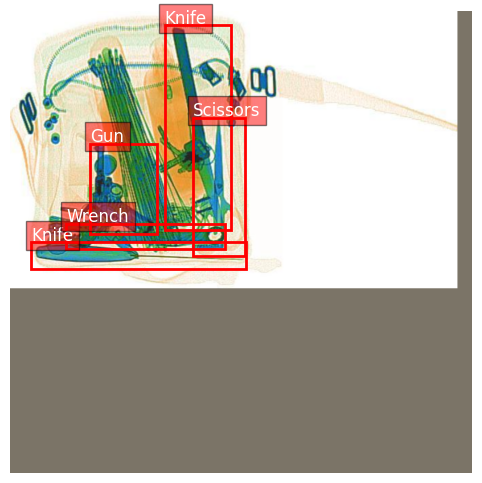

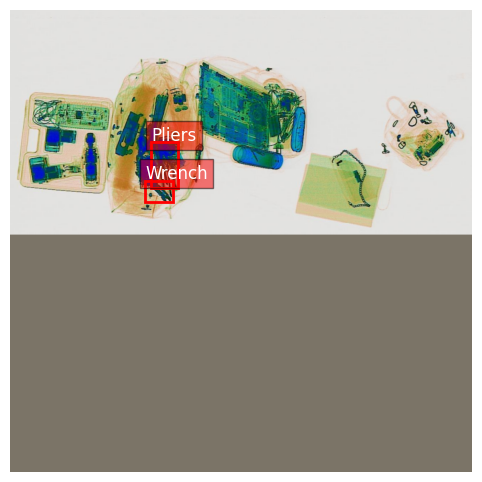

In [3]:
dataloader = get_train_dataloader(100, True, 2)

id2label = dataloader.dataset.categories

positive_count = 0
negative_count = 0
max_each = 5

for batch in dataloader:
    for i in range(len(batch["labels"])):
        target = batch["labels"][i]
        boxes = target["boxes"]

        if boxes.numel() > 0 and positive_count < max_each:
            show_image_with_boxes(
                image_tensor=batch["pixel_values"][i],
                target=target,
                id2label=id2label
            )
            positive_count += 1

        elif boxes.numel() == 0 and negative_count < max_each:
            show_image_with_boxes(
                image_tensor=batch["pixel_values"][i],
                target=target,
                id2label=id2label
            )
            negative_count += 1

        if positive_count >= max_each and negative_count >= max_each:
            break
    if positive_count >= max_each and negative_count >= max_each:
        break

